<a href="https://colab.research.google.com/github/zakilbaki/ml-2025/blob/main/notebooks/01_regression_lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import sys
assert sys.version_info >= (3, 7)

ce code permet de travailler avec la version 3.7 de python

In [34]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

code qui permet de chosir la version de sckit learn


In [35]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fixer des valeurs par defaut pour les plot


In [36]:
import numpy as np
np.random.seed(42)

√† chaque fois qu'on a recourt √† l'aleatoire il faut fixer une seed 42 est un nombre par defaut en data science

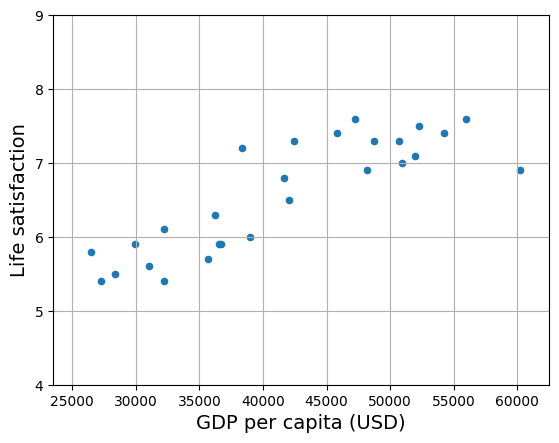

[[6.30165767]]


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
lifesat.head(10);
#affichage des 10 premiere lignes du dataset
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()
# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]
y_pred = model.predict(X)



il y'a plusieurs mani√®res de visualiser des donn√©es selon ce qu'on veut c
üî∏ 2 variables num√©riques ‚ûî scatter plot

üî∏ 1 num√©rique + 1 cat√©gorie ‚ûî boxplot ou violin

üî∏ corr√©lations multiples ‚ûî heatmap

üî∏ √©volution dans le temps ‚ûî line plot

on remarque clairement une pseudo_pente donc notre meilleur piste est la regression lin√©aire

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# MSE
mse = mean_squared_error(y, y_pred)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y, y_pred)

# R¬≤
r2 = r2_score(y, y_pred)

# Affichage
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R¬≤: {r2}")


MAE: 0.3124894252074292
MSE: 0.15394596065527694
RMSE: 0.3923594788650797
R¬≤: 0.7272610933272652


D'apr√®s le MAE le mod√®le ce trompe de 0.31 sur chaque pr√©diction
Si le mse et le rmse sont tres eleve alors on peut conclure qu'il ya des outliers dans l'effet est non n√©gligable
LE R^2 doit etre le plus proche de 1 dans notre cas R^2=0.72 cad que le modele arrive √† explique 72% de la variance/distrubition des donn√©es

In [39]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model1 = KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X, y)

# Make a prediction for Cyprus
print(model.predict(X_new)) # outputs [[6.33333333]]
y1_pred = model1.predict(X)


[[6.30165767]]


ce code permet de travailler avec le KNEIghborsRegressor en fixant 3 voisin

In [40]:
mse1 = mean_squared_error(y, y1_pred)

# RMSE
rmse1 = np.sqrt(mse1)

# MAE
mae1 = mean_absolute_error(y, y1_pred)

# R¬≤
r21 = r2_score(y, y1_pred)

# Affichage
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")
print(f"R¬≤: {r21}")

MAE: 0.23827160493827151
MSE: 0.08489711934156367
RMSE: 0.2913711024476581
R¬≤: 0.8495917177019541


le modele du k_neighbors est bien plus performant que la regression lin√©aire cela montre que meme si le modele a globalement l'aire d'avoir une relation lin√©aire croissante ici , ce n'est pas le cas

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# On d√©finit les valeurs de k √† tester
param_grid = {'n_neighbors': np.arange(1, 20)}

# On d√©finit le mod√®le KNN
knn = KNeighborsRegressor()

# On d√©finit la grille de recherche avec validation crois√©e 5-fold
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# On entra√Æne la recherche sur tout X et y
grid_search.fit(X, y)

# R√©sultat optimal
print("Best k:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))


Best k: {'n_neighbors': np.int64(4)}
Best RMSE: 0.3530521680054284


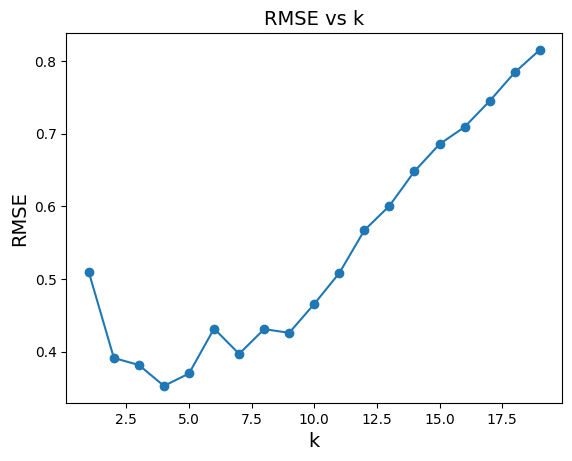

In [42]:
import matplotlib.pyplot as plt

k_values = param_grid['n_neighbors']
scores = -grid_search.cv_results_['mean_test_score']
rmse_scores = np.sqrt(scores)

plt.plot(k_values, rmse_scores, marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs k')
plt.show()


pour pouvoir trouver exactement la valeur de k on fait le grid search on localise les valeurs min de k puis test manuellement


In [43]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

l'id√©e derri√®re ce code est de sauvegarde dirrectement les plots dans un fichier  

In [44]:
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [45]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [46]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

GDP per capita (USD)
Country                                          
Afghanistan                           1978.961579
Africa Eastern and Southern           3387.594670
Africa Western and Central            4003.158913
Albania                              13295.410885
Algeria                              10681.679297

DANS CE CODE ON PEUT VOIR L'interet de mettre en colonne on index , en effet ca sert √† utiliser mergeby(fusionner de dataset) ou groupeby(groupbby something une colonne)

In [47]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator  Air pollution  Dwellings without basic facilities  \
Country                                                        
Australia            5.0                                 NaN   
Austria             16.0                                 0.9   
Belgium             15.0                                 1.9   
Brazil              10.0                                 6.7   
Canada               7.0                                 0.2   

Indicator  Educational attainment  Employees working very long hours  \
Country                                                                
Australia                    81.0                              13.04   
Austria                      85.0                               6.66   
Belgium                      77.0                               4.75   
Brazil                       49.0                               7.13   
Canada                       91.0                               3.69   

Indicator  Employment rate  Feeling safe walking alone at night  \
Country                                                           
Australia             73.0                                 63.5   
Austria               72.0                                 80.6   
Belgium               63.0                                 70.1   
Brazil                61.0                                 35.6   
Canada                73.0                                 82.2   

Indicator  Homicide rate  Household net adjusted disposable income  \
Country                                                              
Australia            1.1                                   32759.0   
Austria              0.5                                   33541.0   
Belgium              1.0                                   30364.0   
Brazil              26.7                                       NaN   
Canada               1.3                                   30854.0   

Indicator  Household net wealth  Housing expenditure  ...  Personal earnings  \
Country                                               ...                      
Australia              427064.0                 20.0  ...            49126.0   
Austria                308325.0                 21.0  ...            50349.0   
Belgium                386006.0                 21.0  ...            49675.0   
Brazil                      NaN                  NaN  ...                NaN   
Canada                 423849.0                 22.0  ...            47622.0   

Indicator  Quality of support network  Rooms per person  Self-reported health  \
Country                                                                         
Australia                        95.0               NaN                  85.0   
Austria                          92.0               1.6                  70.0   
Belgium                          91.0               2.2                  74.0   
Brazil                           90.0               NaN                   NaN   
Canada                           93.0               2.6                  88.0   

Indicator  Stakeholder engagement for developing regulations  Student skills  \
Country                                                                        
Australia                                                2.7           502.0   
Austria                                                  1.3           492.0   
Belgium                                                  2.0           503.0   
Brazil                                                   2.2           395.0   
Canada                                                   2.9           523.0   

Indicator  Time devoted to leisure and personal care  Voter turnout  \
Country                                                               
Australia                                      14.35           91.0   
Austria                                        14.55           80.0   
Belgium                                        15.70           89.0   
Brazil                                  

In [48]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

GDP per capita (USD)  Life satisfaction
Country                                              
South Africa          11466.189672                4.7
Colombia              13441.492952                6.3
Brazil                14063.982505                6.4
Mexico                17887.750736                6.5
Chile                 23324.524751                6.5

to illustrate the risk of overfitting, I use only part of the data in most figures (all countries with a GDP per capita between min_gdp and max_gdp). Later in the chapter I reveal the missing countries, and show that they don't follow the same linear trend at all.

In [49]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

GDP per capita (USD)  Life satisfaction
Country                                         
Russia           26456.387938                5.8
Greece           27287.083401                5.4
Turkey           28384.987785                5.5
Latvia           29932.493910                5.9
Hungary          31007.768407                5.6

In [50]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

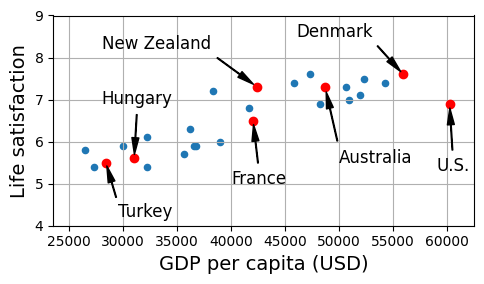

In [51]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('money_happy_scatterplot')
plt.show()

code pour mettre en valeur certaines donn√©es == bonne id√©es arrows
### üìå M√©thodes pour mettre en valeur des points dans un scatter plot :

- ‚ûî **Changer la couleur (color mapping)** : mettre en couleur les points selon une condition (ex: Life Satisfaction < 5).
- ‚ûî **Changer la taille (size mapping)** : varier la taille des points selon une variable (ex: population).
- ‚ûî **Annotations** : afficher le nom des points directement sur le graphique.
- ‚ûî **Dessiner des zones (highlight area)** : encadrer des sous-ensembles avec des rectangles ou des zones de couleur.
- ‚ûî **Ajouter du texte explicatif** : ins√©rer des commentaires fixes sur le graphique.
- ‚ûî **L√©gende diff√©renci√©e** : grouper les points avec des couleurs et ajouter une l√©gende.
- ‚ûî **Interactif (Plotly, Altair)** : rendre le plot interactif avec survol et zoom.


In [52]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

GDP per capita (USD)  Life satisfaction
Country                                               
Turkey                 28384.987785                5.5
Hungary                31007.768407                5.6
France                 42025.617373                6.5
New Zealand            42404.393738                7.3
Australia              48697.837028                7.3
Denmark                55938.212809                7.6
United States          60235.728492                6.9

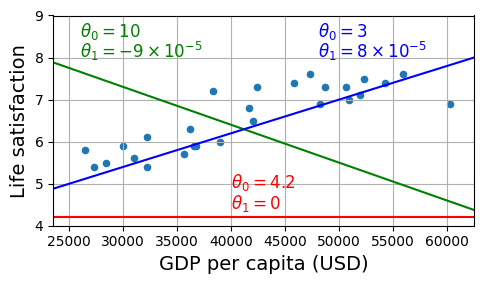

In [53]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('tweaking_model_params_plot')
plt.show()

influence des param√®tres de la pente = claire


In [54]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"Œ∏0={t0:.2f}, Œ∏1={t1:.2e}")

Œ∏0=3.75, Œ∏1=6.78e-05


recup√©ration des param√®tres d'une pente


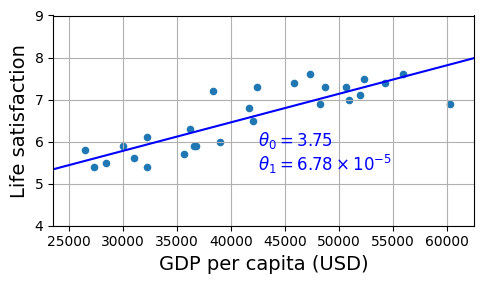

In [55]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('best_fit_model_plot')
plt.show()

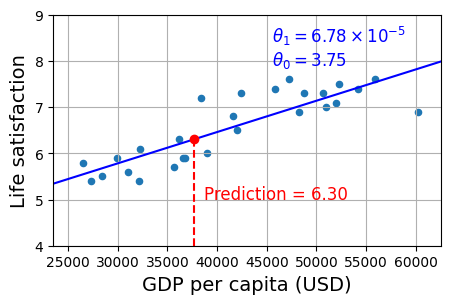

In [56]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

manierer de plot une prediction en particulier interessant


In [57]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

GDP per capita (USD)  Life satisfaction
Country                                              
South Africa          11466.189672                4.7
Colombia              13441.492952                6.3
Brazil                14063.982505                6.4
Mexico                17887.750736                6.5
Chile                 23324.524751                6.5
Norway                63585.903514                7.6
Switzerland           68393.306004                7.5
Ireland               89688.956958                7.0
Luxembourg           110261.157353                6.9

In [58]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

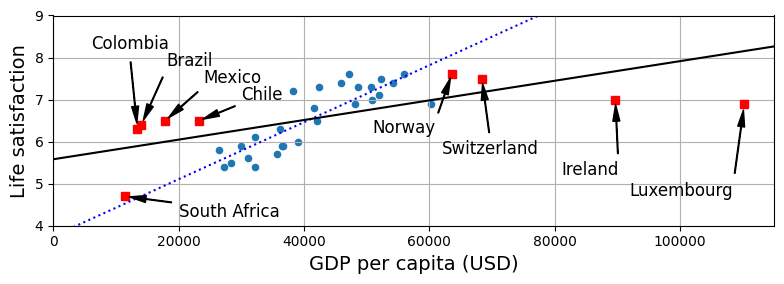

In [59]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('representative_training_data_scatterplot')
plt.show()

on vient bien ici l'effet des outliers on peut le voir mieux en faisant une evaluation du mse ou rmse ,
#remarque : si je veux plotter des point d'un meme dataset de deux maniere je peux juste le filtrer ou diviser le dataset selon les critere demander


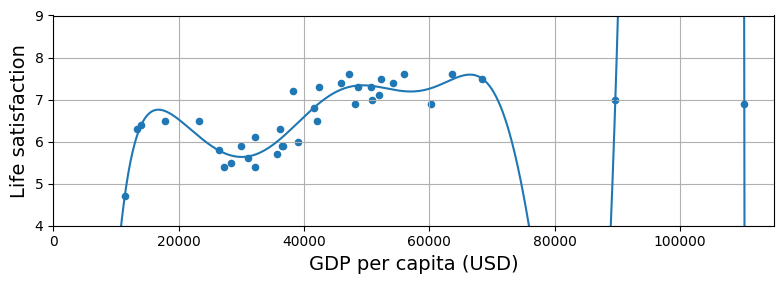

In [60]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('overfitting_model_plot')
plt.show()

ici le plus important c'est de voir les etapes de la regression polynomial , premierement polynomial(10) calcul x x2 x3 x4 ... puis standardiser est tres important car les grandes puissances de x peuvent devenir enorme  ,puis il faut voir comment les pipeline automatises le procedes tout en √©vitant les fuites de donn√©eset plein d'autre avantage qu'on explorera demain

In [61]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][lifesat_col]
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

GDP per capita (USD)
Country                                         
Malawi                               1486.778248
Rwanda                               2098.710362
Zimbabwe                             2744.690758
Africa Western and Central           4003.158913
Papua New Guinea                     4101.218882
Lower middle income                  6722.809932
Eswatini                             8392.717564
Low & middle income                 10293.855325
Arab World                          13753.707307
Botswana                            16040.008473
World                               16194.040310
New Zealand                         42404.393738
Sweden                              50683.323510
Norway                              63585.903514
Switzerland                         68393.306004

ici on peut voir quand a gen√©ralement la possibilit√© d'isoler des parties du dataset selon des crit√©res qui peuvent varier selon ce qu'on veut donc c'est tres pratique , de plus on peut trier ce qui est tres int√©ressent



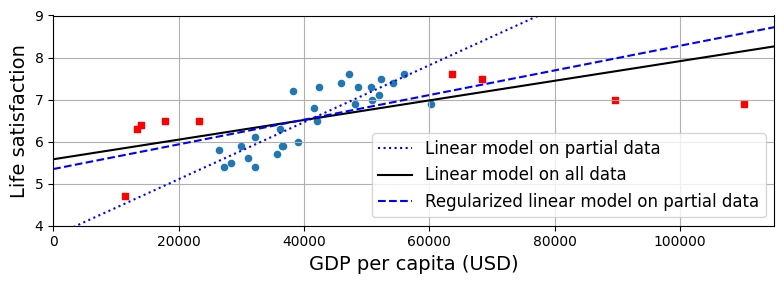

In [62]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('ridge_model_plot')
plt.show()

Indispensable d√®s que tu fais du ML sur de petits datasets (tr√®s fr√©quent en vrai).
Permet de lutter contre l'overfitting.
Tu retrouveras ce principe partout :
Ridge ‚Üí L2
Lasso ‚Üí L1
ElasticNet ‚Üí combinaison L1+L2
Et m√™me dans le Deep Learning (Dropout, EarlyStopping = formes de r√©gularisation)
‚ûî Ridge Regression (L2)
On minimise :
Cost=MSE+ùõº‚àëwj^2‚Äã
‚ûî Lasso Regression (L1)
On minimise :

Cost=MSE+ùõº‚àë‚Äã‚à£wj‚Äã‚à£



Imaginons tu fais une r√©gression polynomiale degr√© 10 :

Sans r√©gularisation ‚ûî ta courbe va faire des vagues folles pour passer exactement par tous les points.

Avec r√©gularisation ‚ûî ta courbe va rester plus lisse, √©viter les oscillations absurdes aux extr√©mit√©s.
en gros la regulaeisation sert √† controller les coefficient en √©vitant qu'il s'explose afin de coller parfaitement aux donn√©es
il faut remarquer que la courbe des donne regulariser s'approche de celes avec des donnes manquantes c√†d l'ideal